## Nama   : Ria Esafri
## NIM      : 09011181722016
## Kelas   : SK 5 B
## Dosen Pengampuh : Prof. Dr. Ir. Siti Nurmaini, M.T. 


# "Implementasi Metode Fuzzy Untuk Mengukur Tingkat Kesuburan Tanah Berbasis Mikrokontroler Arduino"

Kesuburan tanah menjadi faktor utama dalam pertumbuhan sebuah tanaman berupa buah, bunga hingga pepohonan. Faktor kesuburan tanah salah satunya yaitu kadar elektrolit pada tanah yang merupakan unsur pokok tanah untuk membuat air pada tanah dapat diserap oleh tumbuhan dengan baik. Setiap keadaan tanah memiliki kadar elektrolit yang berbeda sehingga untuk menentukan tanah tersebut subur tidaknya dibutuhkan sebuah mekansime pengujian laboratorium yang pada umumnya menghabiskan waktu 3-5 hari dalam proses pengujian kesuburan tanah. Pembuatan sistem yang dapat menguji kesuburan tanah dengan mengaplikasikan sensor soil moisture FC-28(sensor kelembaban ) pada mikrokontroler arduino sebagai unit proses dan ditanamkan sebuah kecerdasan buatan menggunakan metode fuzzy sebagai unit satuan pemrosesan sistem.
#### Dalam menentukan tingkat kesuburan tanah, ada beberapa hal yang menjadi pertimbangan diantaranya :
1. Tingkat elektrolit tanah (dalam paper ini mengunakan Sensor Elektrolit)
1. Tingkat kelembapan tanah (dalam paper ini mengunakan Sensor Kelembapan)

### *Variabel Input*
1. Sensor Elektrolit
2. Sensor Kelembapan

### *Variabel Output*
1. Kesuburan

In [37]:
#Membuat library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [38]:
#Membuat variabel
elektrolit = np.arange(1,101,1)
kelembapan = np.arange(1,101,1)
kesuburan = np.arange(0,4,1)

# 1. *Fuzzification*

## *a. Keanggotaan input 1 (Sensor Elektrolit)*
1. Rendah
2. Sedang
3. Tinggi
4. Sangat Tinggi

| Fungsi |   Nama Variabel    | Nama Himpunan Fuzzy |   Semesta pembicaraan  | Domain      |
|--------|--------------------|---------------------|------------------------|-------------|
| Input 1 | Sensor Elektrolit  |   Rendah            |   [1..100]             |  [1..30]   |
|        |                    |   Sedang            |                        |  [25..50]   |
|        |                    |   Tinggi            |                        |  [45..75]   |
|        |                    |   Sangat Tinggi     |                        |  [70..100]  |

#### *Berikut adalah persamaan garis pada input :Sensor Elektrolit*
1. $Elektrolit[Rendah] =
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 30 \\
       {30-x \over 30-25} & \mbox{; } 25 < x < 30 \\
       1 & \mbox{; } x \leq 25
    \end{array}
\right.$ 

2. $Elektrolit[Sedang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 25 \ atau \ x \geq 50\\
       {x-25 \over 30-25} & \mbox{; } 25 < x \leq 30 \\
       1 & \mbox{; } x > 30 \ atau \ x \leq 45\\
       {50 - x \over 50 - 45} & \mbox{; } 45 < x < 50 \\
    \end{array}
\right.$

3. $Elektrolit[Tinggi] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 45 \ atau \ x \geq 75\\
       {x-45 \over 50-45} & \mbox{; } 45 < x \leq 50 \\
       1 & \mbox{; } x \ > 50 \ atau \ x \leq 70\\
       {75-x \over 75-70} & \mbox{; } 70 < x < 75 \\
    \end{array}
\right.$

4. $Elektrolit[Sangat Tinggi] =
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 70 \\
       {x-70 \over 75-70} & \mbox{; } 70 \leq x < 75 \\
       1 & \mbox{; } x \geq 75
    \end{array}
\right.$

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


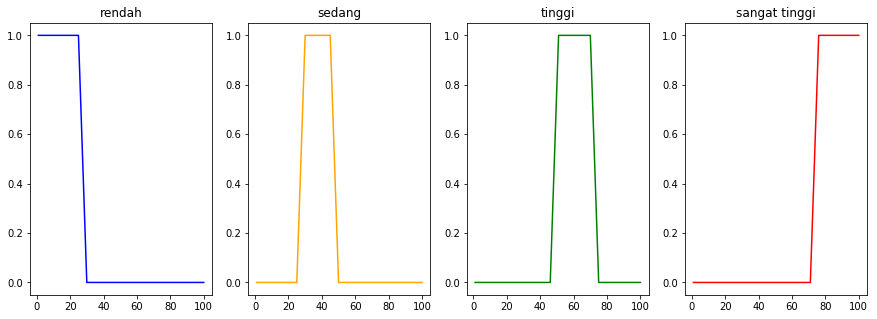

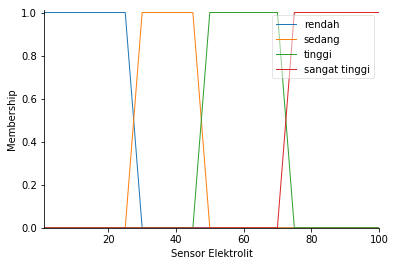

In [39]:
#Mendeklarasikan variabel ke funsi keanggotaan elektrolit
#Menampilkan per keanggotaan elektrolit
elektrolit_r = fuzz.trapmf(elektrolit, [1, 1, 25, 30])
elektrolit_s = fuzz.trapmf(elektrolit, [25, 30, 45, 50])
elektrolit_t = fuzz.trapmf(elektrolit, [46, 51, 70, 75])
elektrolit_st = fuzz.trapmf(elektrolit, [71, 76, 100, 100])
fig,(ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(15,5))
ax0.plot(elektrolit, elektrolit_r, 'blue', linewidth=1.5)
ax1.plot(elektrolit, elektrolit_s, 'orange', linewidth=1.5)
ax2.plot(elektrolit, elektrolit_t, 'green', linewidth=1.5)
ax3.plot(elektrolit, elektrolit_st, 'red', linewidth=1.5)
ax0.set_title('rendah')
ax1.set_title('sedang')
ax2.set_title('tinggi')
ax3.set_title('sangat tinggi')

#Menampilkan gabungan dari fungsi keanggotaan elektrolit
x_elektrolit = ctrl.Antecedent(np.arange(1,101,1), 'Sensor Elektrolit')
x_elektrolit['rendah'] = fuzz.trapmf(x_elektrolit.universe, [1, 1, 25, 30])
x_elektrolit['sedang'] = fuzz.trapmf(x_elektrolit.universe, [25, 30, 45, 50])
x_elektrolit['tinggi'] = fuzz.trapmf(x_elektrolit.universe, [45, 50, 70, 75])
x_elektrolit['sangat tinggi'] = fuzz.trapmf(x_elektrolit.universe, [70, 75, 100, 100])
x_elektrolit.view()

## *b. Keanggotaan input 2 (Sensor Kelembapan)*
1. Kering
2. Sedang
3. Lembab
4. Sangat Lembab

| Fungsi |   Nama Variabel    | Nama Himpunan Fuzzy |   Semesta pembicaraan  | Domain      |
|--------|--------------------|---------------------|------------------------|-------------|
| Input 2 | Sensor Kelembapan  |   Kering            |   [1..100]             |  [70..100]  |
|        |                    |   Sedang            |                        |  [45..75]   |
|        |                    |   Lembab            |                        |  [25..50]   |
|        |                    |   Sangat Lembab     |                        |  [1..30]   |

#### *Berikut adalah persamaan garis pada input :Sensor Kelembapan*
1. $Kelembaban[Kering] =
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 30 \\
       {30-x \over 30-25} & \mbox{; } 25 < x < 30 \\
       1 & \mbox{; } x \leq 25
    \end{array}
\right.$ 

2. $Kelembaban[Sedang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 25 \ atau \ x \geq 50\\
       {x-25 \over 30-25} & \mbox{; } 25 < x \leq 30 \\
       1 & \mbox{; } x > 30 \ atau \ x \leq 45\\
       {50 - x \over 50 - 45} & \mbox{; } 45 < x < 50 \\
    \end{array}
\right.$

3. $Kelembaban[Lembab] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 45 \ atau \ x \geq 75\\
       {x-45 \over 50-45} & \mbox{; } 45 < x \leq 50 \\
       1 & \mbox{; } x \ > 50 \ atau \ x \leq 70\\
       {75-x \over 75-70} & \mbox{; } 70 < x < 75 \\
    \end{array}
\right.$

4. $Kelembaban[Sangat Lembab] =
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 70 \\
       {x-70 \over 75-70} & \mbox{; } 70 \leq x < 75 \\
       1 & \mbox{; } x \geq 75
    \end{array}
\right.$

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


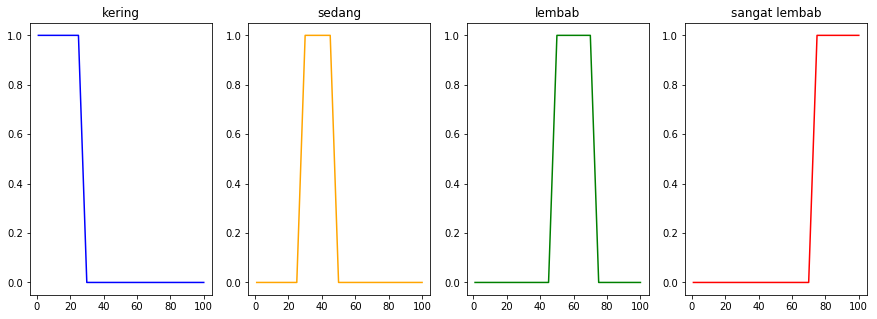

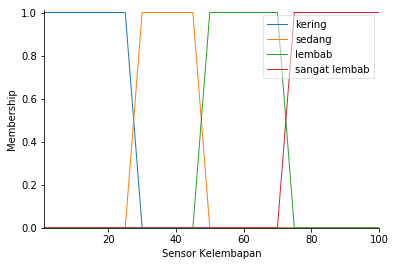

In [40]:
#Mendeklarasikan variabel ke funsi keanggotaan kelembapan
#Menampilkan per keanggotaan kelembapan
kelembapan_sl = fuzz.trapmf(kelembapan, [70, 75, 100, 100])
kelembapan_l = fuzz.trapmf(kelembapan, [45, 50, 70, 75])
kelembapan_s = fuzz.trapmf(kelembapan, [25, 30, 45, 50])
kelembapan_k = fuzz.trapmf(kelembapan, [1, 1, 25, 30])
fig,(ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(15,5))
ax0.plot(kelembapan, kelembapan_k, 'blue', linewidth=1.5)
ax1.plot(kelembapan, kelembapan_s, 'orange', linewidth=1.5)
ax2.plot(kelembapan, kelembapan_l, 'green', linewidth=1.5)
ax3.plot(kelembapan, kelembapan_sl, 'red', linewidth=1.5)
ax3.set_title('sangat lembab')
ax2.set_title('lembab')
ax1.set_title('sedang')
ax0.set_title('kering')

#Menampilkan gabungan dari fungsi keanggotaan kelembapan
x_kelembapan = ctrl.Antecedent(np.arange(1,101,1), 'Sensor Kelembapan')
x_kelembapan['kering'] = fuzz.trapmf(x_kelembapan.universe, [1, 1, 25, 30])
x_kelembapan['sedang'] = fuzz.trapmf(x_kelembapan.universe, [25, 30, 45, 50])
x_kelembapan['lembab'] = fuzz.trapmf(x_kelembapan.universe, [45, 50, 70, 75])
x_kelembapan['sangat lembab'] = fuzz.trapmf(x_kelembapan.universe, [70, 75, 100, 100])
x_kelembapan.view()

# *c. Keanggotaan Output (Kesuburan)*
1. Rendah
2. Sedang
3. Tinggi
4. Sangat Tinggi


| Fungsi |   Nama Variabel    | Nama Himpunan Fuzzy |   Semesta pembicaraan  | Domain      |
|--------|--------------------|---------------------|------------------------|-------------|
| Output | Tingkat Kelembapan |   Tidak Subur       |   [0..4]               |   [0..1]    |
|        |                    |   Kurang Subur      |                        |   [0..2]    |
|        |                    |   Subur             |                        |   [1..3]     |
|        |                    |   Sangat Subur      |                        |   [2..3]    |
#### *Berikut adalah persamaan garis pada output : Kesuburan*
1. $Kelebapan[Tidak Subur] =
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 1 \\
       {1-x \over 1-0} & \mbox{; } 0 < x < 1 \\
    \end{array}
\right.$

2. $Kelebapan[Kurang Subur] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \ < 0 \ atau \ x \geq 2\\
       {x-0 \over 1-0} & \mbox{; } 0 < x \leq 1 \\
       {2 - x \over 2 - 1} & \mbox{; } 1 < x < 2 \\
    \end{array}
\right.$

3. $Kelebapan[Subur] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 1 \ atau \ x \geq 3\\
       {x-1 \over 2-1} & \mbox{; } 1 \leq x \leq 2 \\
       {3-x \over 3-2} & \mbox{; } 2 < x < 3 \\
    \end{array}
\right.$

4. $Kelebapan[Sangat Subur] =
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 2 \\
       {x-2 \over 3-2} & \mbox{; } 2 < x \leq 3 \\
    \end{array}
\right.$

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


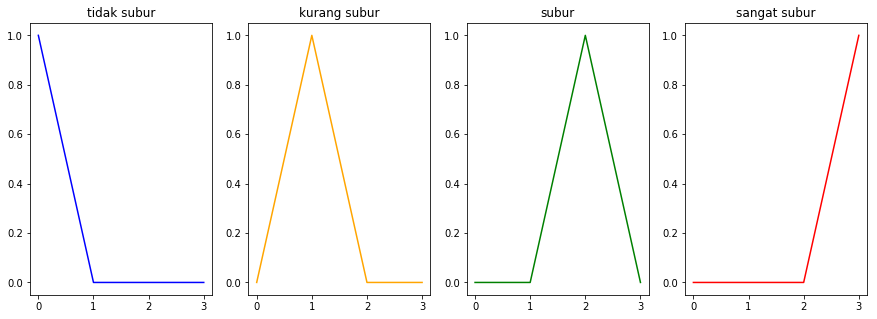

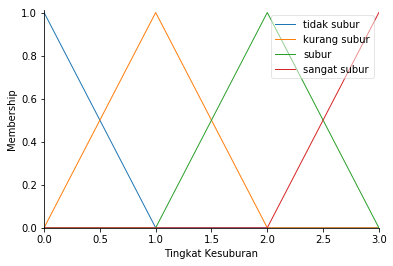

In [41]:
#Mendeklarasikan variabel ke funsi keanggotaan kesuburan
#Menampilkan per keanggotaan kesuburan
tidak_subur = fuzz.trimf(kesuburan, [0,0,1])
kurang_subur= fuzz.trimf(kesuburan, [0,1,2])
subur = fuzz.trimf(kesuburan, [1,2,3])
sangat_subur = fuzz.trimf(kesuburan, [2,3,4])
fig,(ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(15,5))
ax0.plot(kesuburan, tidak_subur, 'blue', linewidth=1.5)
ax1.plot(kesuburan, kurang_subur, 'orange', linewidth=1.5)
ax2.plot(kesuburan, subur, 'green', linewidth=1.5)
ax3.plot(kesuburan, sangat_subur, 'red', linewidth=1.5)
ax0.set_title('tidak subur')
ax1.set_title('kurang subur')
ax2.set_title('subur')
ax3.set_title('sangat subur')

#Menampilkan gabungan dari fungsi keanggotaan kesuburan
y_kesuburan = ctrl.Consequent(np.arange(0,4,1), 'Tingkat Kesuburan')
y_kesuburan['tidak subur'] = fuzz.trimf(y_kesuburan.universe, [0,0,1])
y_kesuburan['kurang subur'] = fuzz.trimf(y_kesuburan.universe, [0,1,2])
y_kesuburan['subur'] = fuzz.trimf(y_kesuburan.universe, [1,2,3])
y_kesuburan['sangat subur'] = fuzz.trimf(y_kesuburan.universe, [2,3,4])
y_kesuburan.view()

# 2. Rule Base
Pada kasus ini terdapat 16 rule base seperti pada tabel dibawah ini :

| No | Input (1) Sensor Elektrolit | Input (2) Sensor Kelembapan |   Output Kesuburan   | 
|----|-----------------------------|-----------------------------|----------------|
| 1  |   Rendah                    |   Kering                    |   Tidak Subur  | 
| 2  |   Rendah                    |   Sedang                    |   Tidak Subur  | 
| 3  |   Rendah                    |   Lembab                    |   Kurang Subur | 
| 4  |   Rendah                    |   Sangat Lembab             |   Subur        |  
| 5  |   Sedang                    |   Kering                    |   Tidak Subur  | 
| 6  |   Sedang                    |   Sedang                    |   Kurang Subur | 
| 7  |   Sedang                    |   Lembab                    |   Kurang Subur | 
| 8  |   Sedang                    |   Sangat Lembab             |   Subur        | 
| 9  |   Tinggi                    |   Kering                    |   Kurang Subur |  
| 10 |   Tinggi                    |   Sedang                    |   Subur        |  
| 11 |   Tinggi                    |   Lembab                    |   Subur        |   
| 12 |   Tinggi                    |   Sangat Lembab             |   Subur        |  
| 13 |   Sangat Tinggi             |   Kering                    |   Kurang Subur |  
| 14 |   Sangat Tinggi             |   Sedang                    |   Subur        |  
| 15 |   Sangat Tinggi             |   Lembab                    |   Subur        |  
| 16 |   Sangat Tinggi             |   Sangat Lembab             |   Sangat Subur |  


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ecf7a0a4e0>)

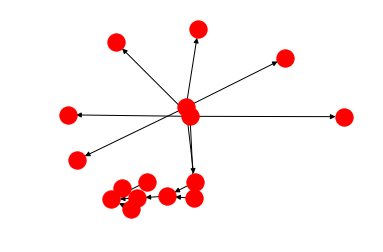

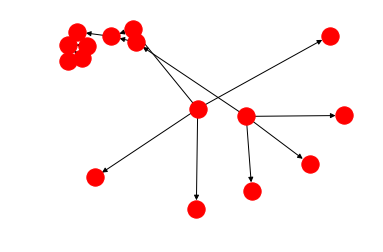

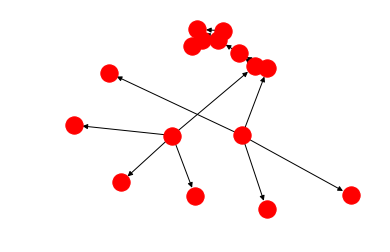

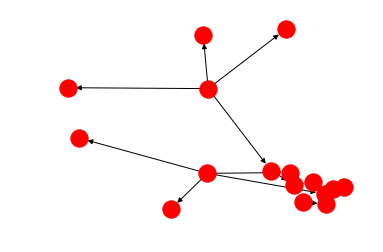

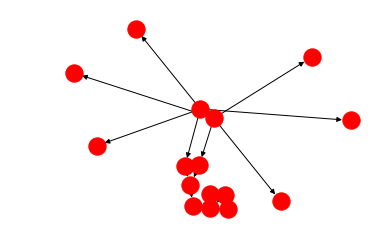

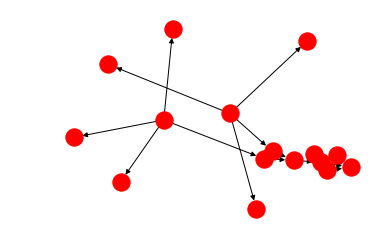

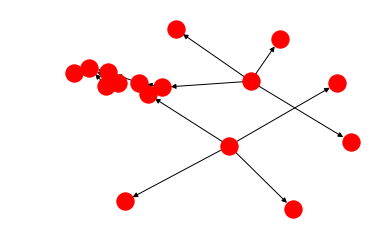

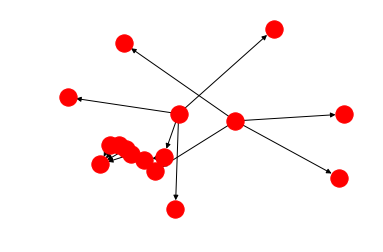

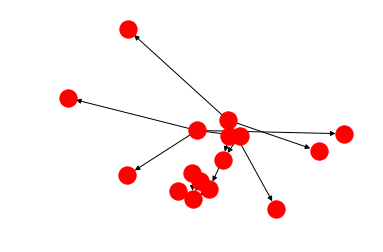

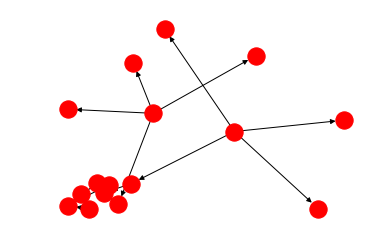

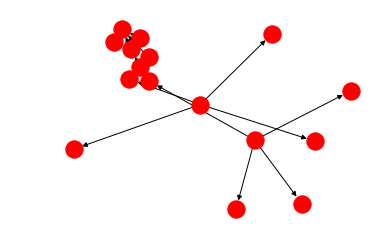

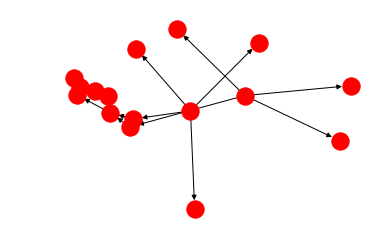

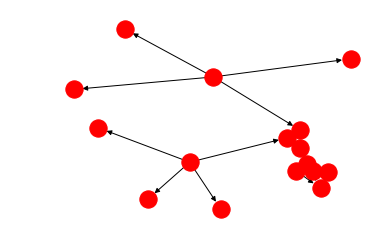

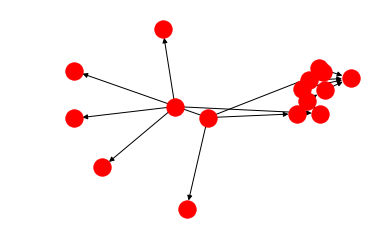

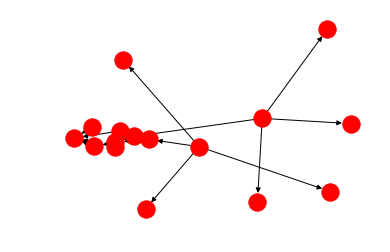

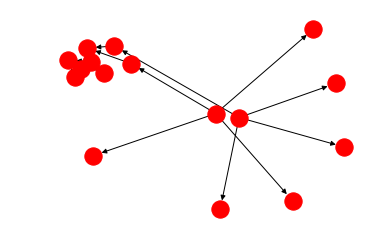

In [42]:
#Rule Base
rule1 = ctrl.Rule(x_elektrolit['rendah'] & x_kelembapan['kering'], y_kesuburan['tidak subur'])
rule2 = ctrl.Rule(x_elektrolit['rendah'] & x_kelembapan['sedang'], y_kesuburan['tidak subur'])
rule3 = ctrl.Rule(x_elektrolit['rendah'] & x_kelembapan['lembab'], y_kesuburan['kurang subur'])
rule4 = ctrl.Rule(x_elektrolit['rendah'] & x_kelembapan['sangat lembab'], y_kesuburan['subur'])
rule5 = ctrl.Rule(x_elektrolit['sedang'] & x_kelembapan['kering'], y_kesuburan['tidak subur'])
rule6 = ctrl.Rule(x_elektrolit['sedang'] & x_kelembapan['sedang'], y_kesuburan['kurang subur'])
rule7 = ctrl.Rule(x_elektrolit['sedang'] & x_kelembapan['lembab'], y_kesuburan['kurang subur'])
rule8 = ctrl.Rule(x_elektrolit['sedang'] & x_kelembapan['sangat lembab'], y_kesuburan['subur'])
rule9 = ctrl.Rule(x_elektrolit['tinggi'] & x_kelembapan['kering'], y_kesuburan['kurang subur'])
rule10 = ctrl.Rule(x_elektrolit['tinggi'] & x_kelembapan['sedang'], y_kesuburan['subur'])
rule11 = ctrl.Rule(x_elektrolit['tinggi'] & x_kelembapan['lembab'], y_kesuburan['subur'])
rule12 = ctrl.Rule(x_elektrolit['tinggi'] & x_kelembapan['sangat lembab'], y_kesuburan['subur'])
rule13 = ctrl.Rule(x_elektrolit['sangat tinggi'] & x_kelembapan['kering'], y_kesuburan['kurang subur'])
rule14 = ctrl.Rule(x_elektrolit['sangat tinggi'] & x_kelembapan['sedang'], y_kesuburan['subur'])
rule15 = ctrl.Rule(x_elektrolit['sangat tinggi'] & x_kelembapan['lembab'], y_kesuburan['subur'])
rule16 = ctrl.Rule(x_elektrolit['sangat tinggi'] & x_kelembapan['sangat lembab'], y_kesuburan['sangat subur'])
#Menampilkan rule base
rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()
rule10.view()
rule11.view()
rule12.view()
rule13.view()
rule14.view()
rule15.view()
rule16.view()

# 3. Fuzzy Inference

Dari beberapa metode dalam fuzzy inference system, metode yang digunakan adalah Metode Mamdani.

In [43]:
#Membuat Variabel untuk menampung rule
kesuburan_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16])

<div class="">
Untuk mensimulasikan sistem kontrol ini, maka dibuat ControlSystemSimulation. Objek ini mewakili pengontrol yang diterapkan pada serangkaian situasi/kasus tertentu. 

In [44]:
tingkat_kesuburan = ctrl.ControlSystemSimulation(kesuburan_ctrl)

# 4. Defuzzifikasi
Defuzzifikasi merupakan pengubahan output fuzzy yang diperoleh dari mesin inferensi menjadi nilai tegas menggunakan fungsi keanggotaan yang sesuai dengan saat dilakukan fuzzyfikasi. Sekarang kita dapat mensimulasikan sistem kontrol hanya dengan menentukan input dan memanggil metode komputasi. 

### Contoh Kasus
Bagaimana kondisi tanah jika input elektrolit pada sensor(1) bernilai 46 dan input kelembaban sensor(2) bernilai 28 dengan fuzzy mamdani ? 

In [45]:
#Memberikan input pada kasus 
tingkat_kesuburan.input['Sensor Elektrolit'] = 46
tingkat_kesuburan.input['Sensor Kelembapan'] = 28
tingkat_kesuburan.compute()

1. $Input.Elektrolit[46] =
\left\{
    \begin{array}{ll}
       {50-46 \over 50-45} = 0.8 \\
       {46-45 \over 50-45} = 0.2 \\
    \end{array}
\right.$

2. $Input.Kelembapan[28] =
\left\{
    \begin{array}{ll}
       {30-28 \over 30-25} = 0.4 \\
       {28-25 \over 30-25} = 0.6 \\
    \end{array}
\right.$

Mengambil nilai Min = (Min(0.8, 0.4), Min (0.8, 0.6), Min(0.2, 0.4), Min(0.2, 0.6)) = (0.4, 0.6, 0.2, 0.2)


#### Dalam menentukan hasil akhir yaitu menggunkan metode COG (Centre Of Gravity)
$COG =
\left\{
    \begin{array}{ll}
       {( (0)x0.4 + (0.5+1.0+1.5)x0.6 + (2.0+2.5+3)x0.2 ) \over (0.4+0.6+0.6+0.6+0.2+0.2+0.2)} = 1.178 \\
    \end{array}
\right.$

1.1777777777777778


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


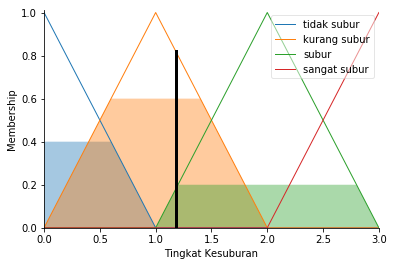

In [46]:
#Menentukan hasil akhir pada kasus
print(tingkat_kesuburan.output['Tingkat Kesuburan'])
y_kesuburan.view(sim=tingkat_kesuburan)

Referensi : Jurnal Teknologi Sistem Informasi dan Sistem Komputer TGD "Implementasi Metode Fuzzy Untuk Sistem Identifikasi Kadar Elektrolit Untuk Mengukur Tingkat Kesuburan Tanah Berbasis Mikrokontroler Arduino "